# Challenge: Sprint 3
##### *Descrição da Entrega:* Análise do banco de dados sobre diabetes e doenças relacionadas
##### *Banco de Dados:* 'Diabetes.csv'

#### Contexto:
Após a análise de um tipo de enfermidade incidente sobre a população (COVID-19), o próximo passo para um cientista de dados é o entendimento preliminar de outra enfermidade e um segundo passo em direção à previsão de enfermidades com algoritmos de machine learning. Para isso, é preciso que o cientista entenda as principais variáveis determinantes da diabetes e a inter-relação entre essas variáveis. Diabetes está entre as doenças crônicas mais prevalentes no mundo, impactando milhões de pessoas a cada ano e exercendo uma carga financeira significativa na economia. O diabetes é uma doença crônica séria em que os indivíduos perdem a capacidade de regular eficazmente os níveis de glicose no sangue, o que pode levar à redução da qualidade e expectativa de vida. Após a digestão dos alimentos, os açúcares resultantes são liberados na corrente sanguínea, sinalizando ao pâncreas para liberar insulina. A insulina ajuda a permitir que as células do corpo utilizem esses açúcares presentes no sangue como fonte de energia. O diabetes é geralmente caracterizado pelo corpo não produzir insulina suficiente ou não conseguir usar a insulina produzida de maneira eficaz.

#### Variáveis:

- Diabetes_012: 0 = sem diabetes, 1 = pré-diabetes, 2 = diabetes
- HighBP: 0 = sem pressão alta, 1 = pressão alta
- HighChol: 0 = sem colesterol alto, 1 = colesterol alto
- CholCheck: 0 = não fez verificação de colesterol nos últimos 5 anos, 1 = fez verificação
- BMI: Índice de Massa Corporal
- Smoker: Já fumou pelo menos 100 cigarros? 0 = não, 1 = sim
- Stroke: Já teve um derrame? 0 = não, 1 = sim
- HeartDiseaseorAttack: Doença cardíaca ou infarto? 0 = não, 1 = sim
- PhysActivity: Atividade física nos últimos 30 dias? 0 = não, 1 = sim
- Fruits: Consumo de frutas 1 ou mais vezes ao dia? 0 = não, 1 = sim
- Veggies: Consumo de vegetais 1 ou mais vezes ao dia? 0 = não, 1 = sim
- HvyAlcoholConsump: Bebedor excessivo? 0 = não, 1 = sim
- AnyHealthcare: Possui algum tipo de cobertura de saúde? 0 = não, 1 = sim
- NoDocbcCost: Precisou de consulta médica, mas não pôde pagar? 0 = não, 1 = sim
- GenHlth: Saúde geral (escala de 1 a 5)
- MentHlth: Quantos dias sua saúde mental não esteve boa nos últimos 30 dias? (escala de 1 a 30)
- PhysHlth: Quantos dias sua saúde física não esteve boa nos últimos 30 dias? (escala de 1 a 30)
- DiffWalk: Dificuldade para caminhar ou subir escadas? 0 = não, 1 = sim
- Sex: 0 = feminino, 1 = masculino
- Age: Categoria de idade em 13 níveis
- Education: Nível de educação (escala de 1 a 6)
- Income: Escala de renda (escala de 1 a 8)

#### Objetivo:
O cientista deve analisar o conjunto de dados para entender o inter-relacionamento entre as variáveis, com uma entrega da análise do banco de dados seguindo os seguintes passos:

#### Valor Total da Entrega (100 pontos)
##### Documentação (80 pontos):
- Análise, limpeza e formatação dos dados: Remoção de duplicatas, identificação de valores nulos e tratamento de outliers (20 pontos)
- Estatísticas descritivas das variáveis (20 pontos)
- Gráficos: entre 3 e 4 gráficos focando na distribuição e inter-relacionamento entre as variáveis (10 pontos)
- Análise de correlação e testes de hipóteses: Cálculo da matriz de correlação e execução de ao menos dois testes de hipótese (20 pontos)
- Organização (10 pontos)

##### Apresentação (20 pontos):
- Descrição resumida do projeto, das variáveis e dos tratamentos realizados na base (5 pontos)
- Comentários sobre as estatísticas descritivas e comportamento dos principais gráficos (5 pontos)
- Conclusões dos testes de correlação e de hipótese (5 pontos)
- Organização (5 pontos): Cinco slides de apresentação executiva, sendo o primeiro com objetivo e resumo executivo, três slides com gráficos e análise de estatísticas descritivas, e um slide final com conclusão geral.

# Importações e Leitura da base

Nesta etapa inicial, vamos importar as bibliotecas necessárias para a análise e carregar a base de dados que contém informações sobre diabetes e outras condições de saúde. Isso nos permitirá começar a explorar os dados e compreender as relações entre as variáveis.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [181]:
df = pd.read_csv('sp03_diabetes.csv')
df_original = df.copy()
df.head(30)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


A base de dados foi carregada com sucesso, permitindo que visualizemos e comecemos a analisar as informações disponíveis sobre os indivíduos, incluindo seu status de diabetes e outras características de saúde.



# Análise, limpeza e formatação dos dados

### Remoção de Duplicatas

Para garantir a qualidade dos dados, vamos remover quaisquer linhas duplicadas na base. Duplicatas podem distorcer os resultados da análise, portanto, é importante eliminá-las.

In [10]:
df.drop_duplicates(inplace=True)
df['Diabetes_012'].count()

229781

In [11]:
df_original['Diabetes_012'].count()

253680

Observamos que o conjunto de dados original possuía 253.680 entradas. Após a remoção de duplicatas, o número de entradas foi reduzido para 229.781. Isso significa que 23.999 linhas duplicadas foram identificadas e removidas, melhorando a confiabilidade da nossa análise.


### Tratamento de Nulos

Em seguida, vamos verificar se há valores nulos (ausentes) nas colunas da base de dados. Valores nulos podem afetar a precisão da análise e precisam ser tratados adequadamente.



In [15]:
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


A verificação indica que não há valores nulos em nenhuma das colunas. Isso significa que não precisamos realizar tratamentos adicionais para valores ausentes.



### Verificando Outliers

Agora, vamos identificar possíveis valores atípicos (outliers) nas variáveis numéricas. Outliers são valores que se desviam significativamente da maioria dos dados e podem influenciar os resultados da análise. Usaremos gráficos do tipo boxplot para visualizar esses possíveis outliers.



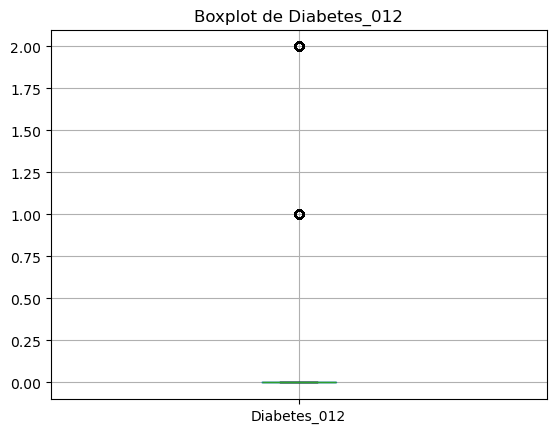

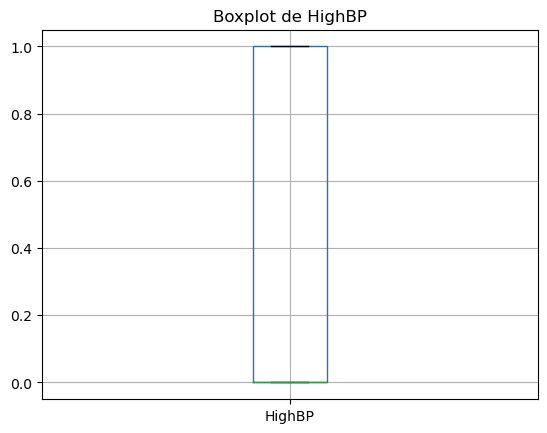

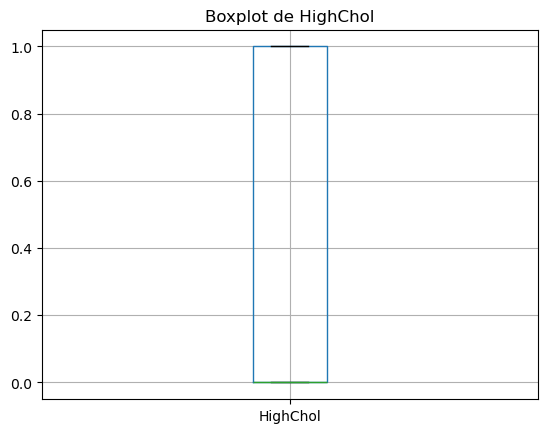

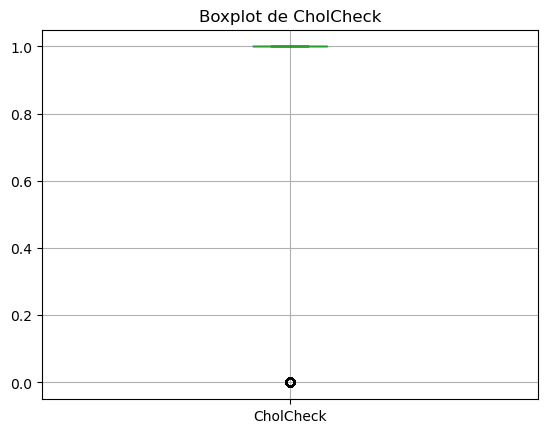

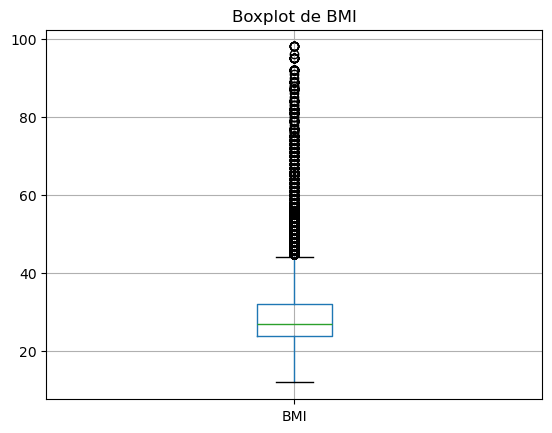

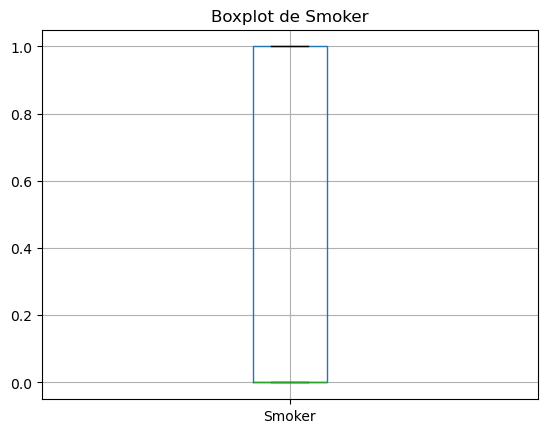

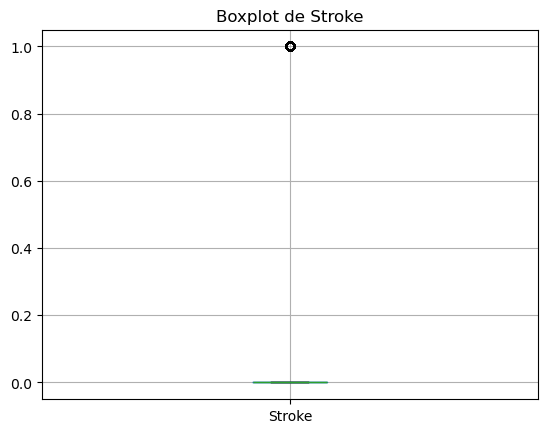

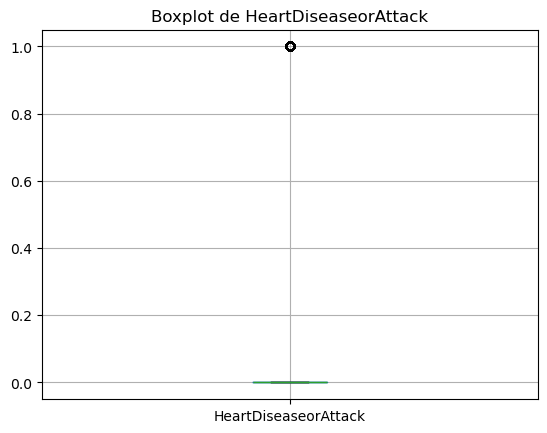

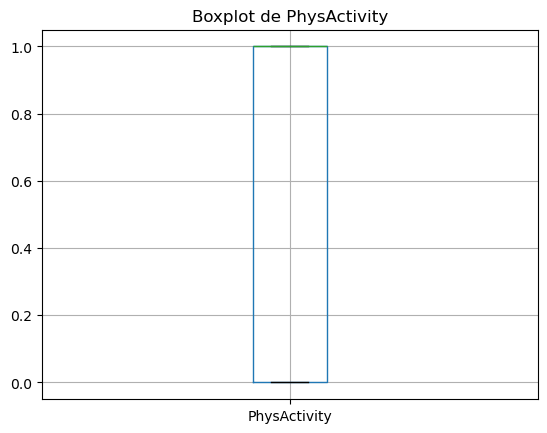

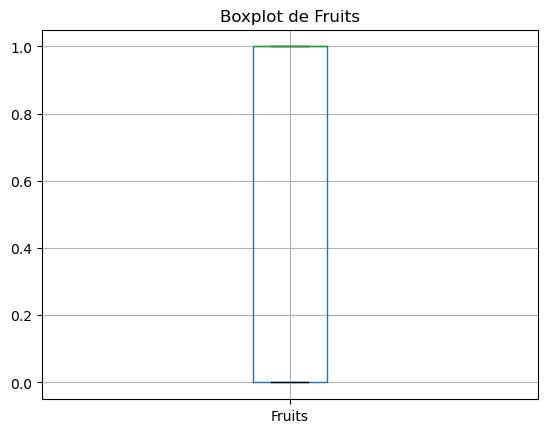

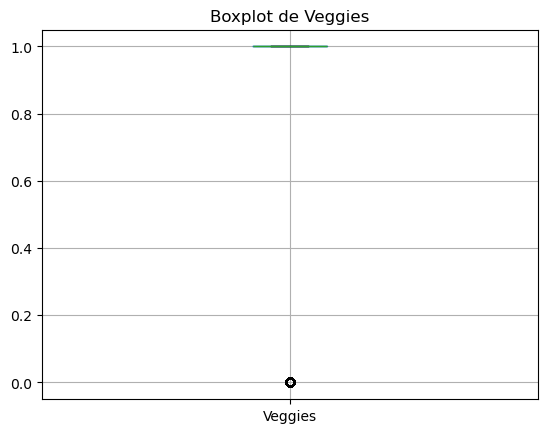

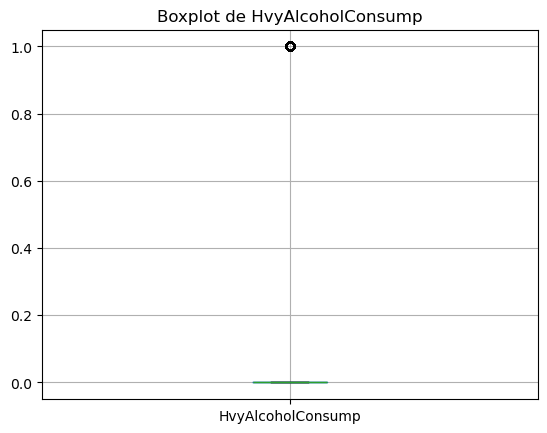

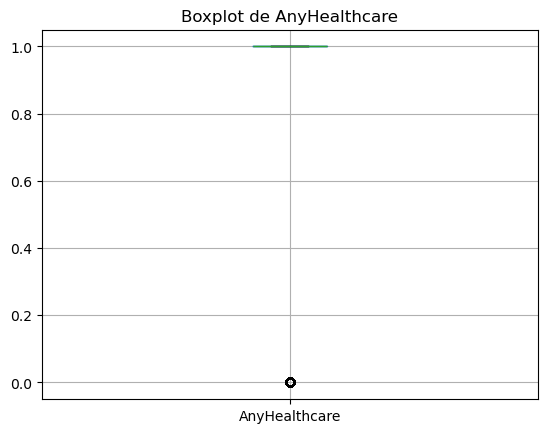

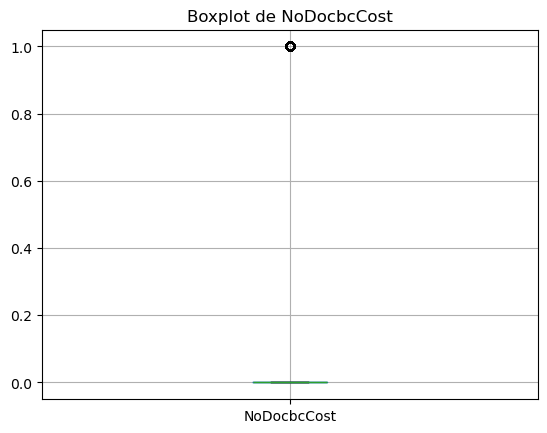

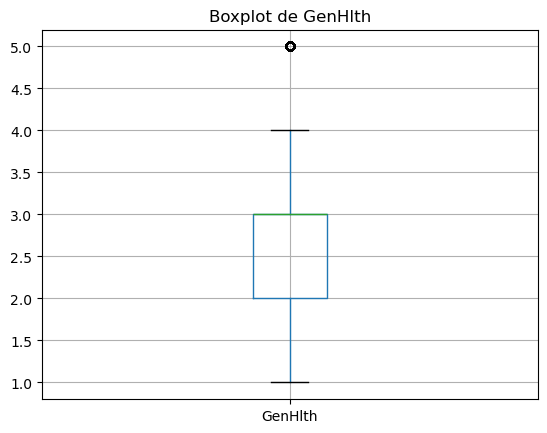

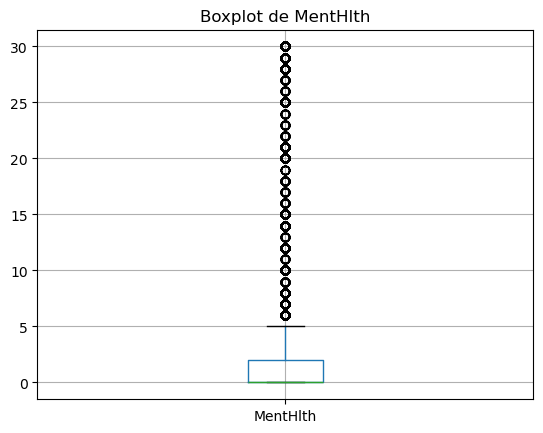

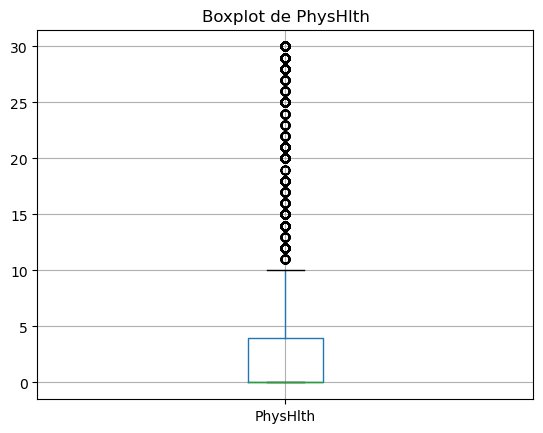

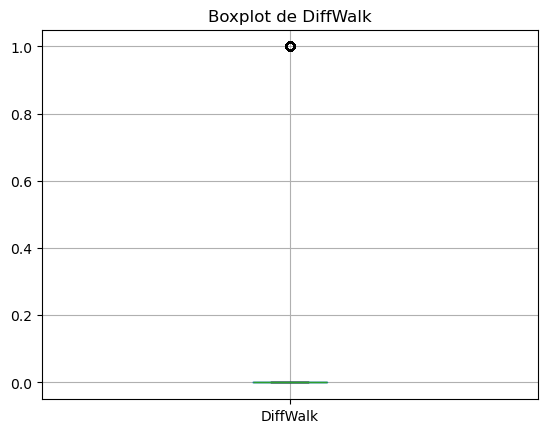

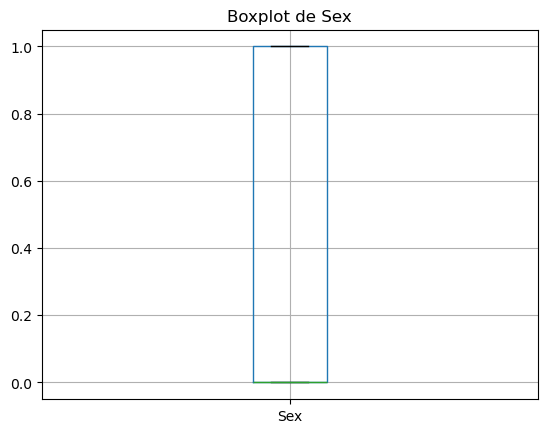

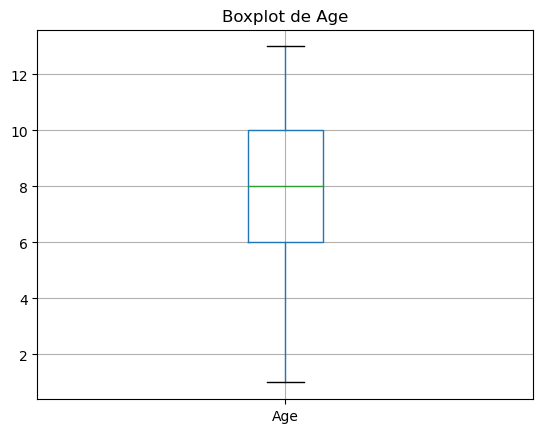

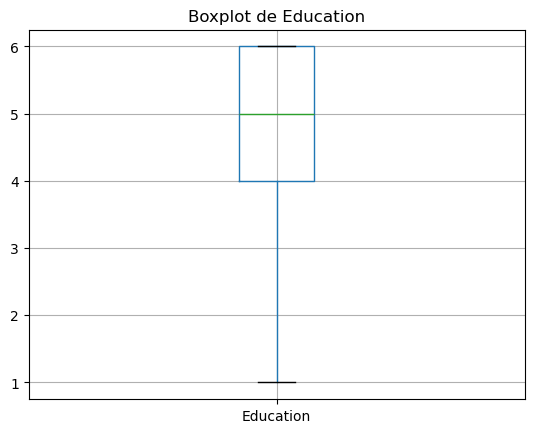

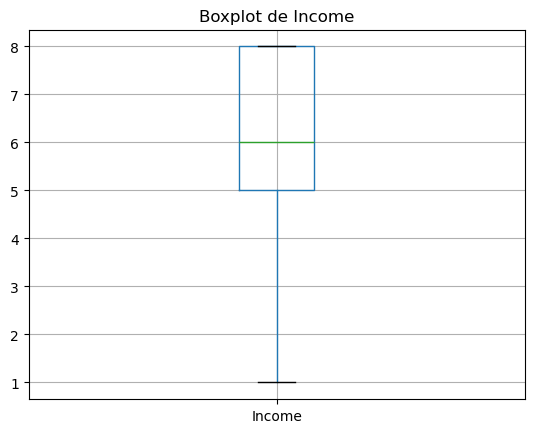

In [19]:
# Criar um boxplot para cada coluna
for column in df.columns:
  plt.figure()  # Cria uma nova figura para cada boxplot
  df.boxplot(column=column)
  plt.title(f'Boxplot de {column}')
  plt.show()

Os boxplots gerados para cada variável nos permitem visualizar a distribuição dos dados e identificar possíveis outliers. As colunas 'BMI' (Índice de Massa Corporal), 'MentHlth' (Saúde Mental) e 'PhysHlth' (Saúde Física) mostraram a presença de valores atípicos.



#### Avaliando Outliers

Para decidir como lidar com esses outliers, vamos examiná-los mais detalhadamente. A função a seguir nos ajuda a identificar quais são esses valores atípicos.



In [23]:
# Identifica Outliers
def outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

# Exibe Outliers
def outliers_iqr_plot(df, outs):
  for i in range(len(outs)):
    out = outliers_iqr(df, outs[i])
    print(outs[i])
    display(out)
  pass

# Verificando outliers 
outs = ['BMI', 'MentHlth', 'PhysHlth']
outliers_iqr_plot(df, outs)

BMI


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,2.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,30.0,1.0,0.0,9.0,6.0,8.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
156,2.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,6.0,5.0
201,2.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,1.0,0.0,0.0,9.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253370,0.0,1.0,0.0,1.0,46.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,6.0,1.0
253382,2.0,1.0,0.0,1.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,6.0,6.0,8.0
253402,2.0,1.0,1.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,7.0,1.0,0.0,7.0,6.0,5.0
253482,0.0,1.0,0.0,1.0,46.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,6.0,6.0


MentHlth


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
14,0.0,0.0,1.0,1.0,33.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,28.0,0.0,0.0,4.0,6.0,2.0
18,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,0.0,2.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253648,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,6.0,14.0,0.0,1.0,5.0,5.0,1.0
253649,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,30.0,5.0,0.0,0.0,4.0,6.0,5.0
253665,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,30.0,30.0,0.0,0.0,5.0,4.0,1.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0


PhysHlth


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
11,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253652,2.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0
253653,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,1.0,10.0,6.0,3.0
253663,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,30.0,0.0,0.0,5.0,6.0,2.0
253665,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,30.0,30.0,0.0,0.0,5.0,4.0,1.0


Embora tenhamos identificado valores que se enquadram como outliers nessas variáveis, ao analisar o contexto, percebemos que eles representam casos extremos, mas plausíveis, como pessoas com alto índice de massa corporal ou muitos dias de saúde física ou mental ruim nos últimos 30 dias. Portanto, em vez de remover ou alterar esses valores, optamos por categorizá-los em faixas para manter a integridade dos dados e facilitar a análise.



#### Tratando Outliers com Categorização


Para tratar os outliers sem distorcer os dados, vamos reestruturar as variáveis 'BMI', 'MentHlth' e 'PhysHlth' em categorias, dividindo seus valores em faixas baseadas nos quartis estatísticos. Isso nos permitirá manter as informações importantes e eliminar a influência excessiva dos outliers.



In [27]:
def categorize_column_by_boxplot(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  median = df[column].median()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  def categorize_value(value):
    if value < lower_bound:
      return 0
    elif value >= lower_bound and value < Q1:
      return 1
    elif value >= Q1 and value < median:
      return 2
    elif value >= median and value < Q3:
      return 3
    elif value >= Q3 and value <= upper_bound:
      return 4
    else:
      return 5

  df[column] = df[column].apply(categorize_value)
  return df

Os valores das colunas seguem a seguinte lógica:
- 0: Ouliers abaixo do Limite Inferior
- 1: Valores que vão a partir do limite inferior até antes do primeiro quartil
- 2: Valores que vão do primeiro quartil até a mediana
- 3: Valores após a mediana até o terceiro quartil
- 4: Valores após o terceiro quartil quartil até o limite superior
- 5: Outliers maiores que o limite inferior


Essa categorização permite manter as informações dos outliers sem afetar a análise, além de tornar os dados mais consistentes para modelos preditivos ou correlações.




#### Aplicando a Categorização e Visualizando os Resultados


Vamos aplicar essa categorização às variáveis e visualizar os boxplots antes e depois do tratamento para confirmar a eficácia da abordagem.



##### Variável BMI (Índice de Massa Corporal)



Sem Tratamento:

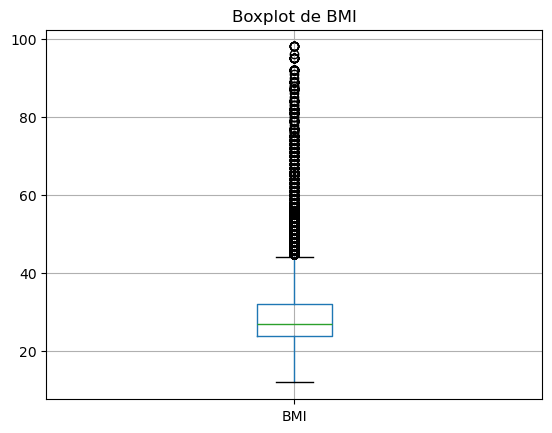

In [33]:
# Boxplot
plt.figure() 
df.boxplot(column=['BMI'])
plt.title(f'Boxplot de BMI')
plt.show()

Com Tratamento:

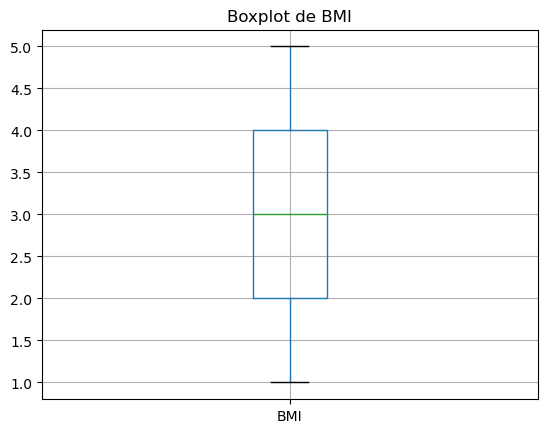

In [35]:
# Categorização
df = categorize_column_by_boxplot(df, 'BMI')
# Boxplot
plt.figure() 
df.boxplot(column=['BMI'])
plt.title(f'Boxplot de BMI')
plt.show()

Após a categorização, observamos que o boxplot de 'BMI' não apresenta mais outliers, indicando que a reestruturação em categorias foi eficaz em mitigar a influência dos valores atípicos.

##### Variável PhysHlth (Saúde Física)



Sem Tratamento:

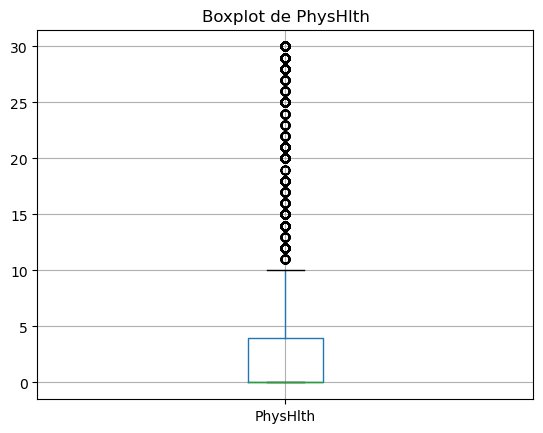

In [39]:
# Boxplot
plt.figure() 
df.boxplot(column=['PhysHlth'])
plt.title(f'Boxplot de PhysHlth')
plt.show()

Com Tratamento:

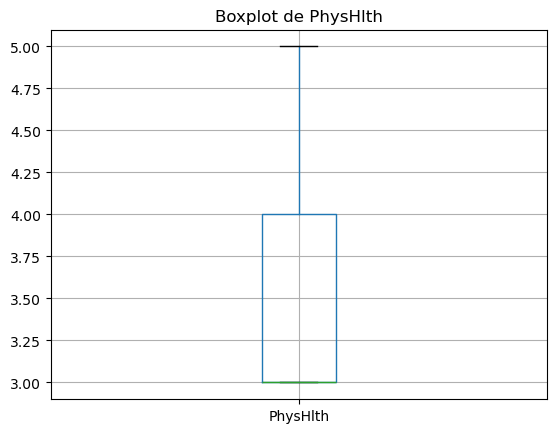

In [41]:
# Categorização
df = categorize_column_by_boxplot(df, 'PhysHlth')
# Boxplot
plt.figure() 
df.boxplot(column=['PhysHlth'])
plt.title(f'Boxplot de PhysHlth')
plt.show()

Após a categorização, observamos que o boxplot de 'PhysHlth' não apresenta mais outliers, indicando que a reestruturação em categorias foi eficaz em mitigar a influência dos valores atípicos.

##### Variável MentHlth (Saúde Mental)



Sem Tratamento:

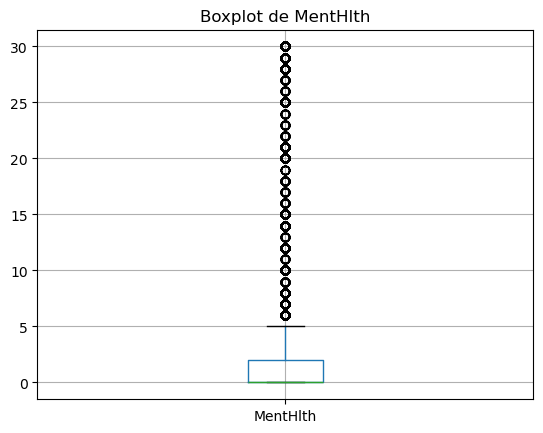

In [45]:
# Boxplot
plt.figure() 
df.boxplot(column=['MentHlth'])
plt.title(f'Boxplot de MentHlth')
plt.show()

Com Tratamento:

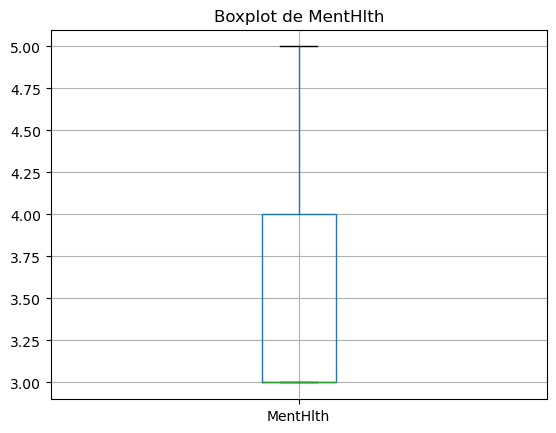

In [47]:
# Categorização
df = categorize_column_by_boxplot(df, 'MentHlth')
# Boxplot
plt.figure() 
df.boxplot(column=['MentHlth'])
plt.title(f'Boxplot de MentHlth')
plt.show()

Em todos os casos, a categorização eliminou a presença de outliers nos boxplots, permitindo uma análise mais equilibrada das variáveis.



# Estatísticas descritivas das variáveis

Com os dados limpos e estruturados, vamos agora gerar estatísticas descritivas para entender o comportamento geral das variáveis. Isso inclui informações como média, mediana, valores mínimos e máximos, entre outros.




#### Resumo Estatístico das Variáveis


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,2.675278,1.110560,1.0,2.0,3.0,4.0,5.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


Com esses resultados, já podemos concluir algumas cosias:
- **Diabetes_012:** A média é 0,3256, indicando que a maioria dos indivíduos não tem diabetes (0 = sem diabetes). Como o valor máximo é 2, confirmamos que os valores possíveis são 0, 1 (pré-diabetes) e 2 (diabetes).
- **HighBP (Pressão Alta):** Com uma média de 0,4544, aproximadamente 45% dos indivíduos têm pressão alta. O desvio padrão próximo de 0,5 reflete a distribuição entre os que têm e não têm a condição.
- **HighChol (Colesterol Alto):** A média de 0,4418 indica que cerca de 44% dos indivíduos apresentam colesterol alto.
- **CholCheck (Verificação de Colesterol):** A média alta de 0,9595 mostra que 95,95% dos indivíduos fizeram verificação de colesterol nos últimos 5 anos, sugerindo uma população bastante consciente sobre a importância desse exame.
- **BMI (Índice de Massa Corporal):** A média é 2,6753, mas como o BMI foi categorizado em faixas de 1 a 5, esse valor indica que a maioria dos indivíduos está nas categorias intermediárias.
- **Smoker (Fumante):** Com média de 0,4657, aproximadamente 46,57% dos indivíduos já fumaram pelo menos 100 cigarros na vida.
- **Stroke (Derrame):** A média baixa de 0,0448 mostra que apenas cerca de 4,48% dos indivíduos relataram ter tido um derrame.
- **HeartDiseaseorAttack (Doença Cardíaca ou Infarto):** Com média de 0,1032, cerca de 10,32% dos indivíduos têm histórico de doença cardíaca ou infarto.
- **PhysActivity (Atividade Física):** A média de 0,7334 indica que 73,34% dos indivíduos praticaram atividade física nos últimos 30 dias.
- **Fruits (Consumo de Frutas):** Com média de 0,6130, aproximadamente 61,30% dos indivíduos consomem frutas uma ou mais vezes ao dia.
- **Veggies (Consumo de Vegetais):** A média de 0,7948 sugere que 79,48% dos indivíduos consomem vegetais diariamente.
- **HvyAlcoholConsump (Consumo Excessivo de Álcool):** A média de 0,0607 indica que apenas 6,07% dos indivíduos são considerados bebedores excessivos.
- **AnyHealthcare (Cobertura de Saúde):** Com média de 0,9461, a maioria dos indivíduos (94,61%) possui algum tipo de cobertura de saúde.
- **NoDocbcCost (Impedimento Financeiro para Consulta):** A média de 0,0928 mostra que 9,28% dos indivíduos precisaram de consulta médica mas não puderam pagar.
- **GenHlth (Saúde Geral):** Com média de 2,6012 em uma escala de 1 a 5, a percepção geral de saúde está ligeiramente acima da média, indicando que os indivíduos se consideram razoavelmente saudáveis.
- **MentHlth (Saúde Mental):** A média de 3,4570 (em uma escala categorizada de 1 a 5) sugere que a maioria dos indivíduos relatou poucos dias de saúde mental ruim nos últimos 30 dias.
- **PhysHlth (Saúde Física):** Similar à saúde mental, a média de 3,4058 indica poucos dias de saúde física ruim.
- **DiffWalk (Dificuldade para Caminhar):** Com média de 0,1855, cerca de 18,55% dos indivíduos têm dificuldade para caminhar ou subir escadas.
- **Sex (Sexo):** A média de 0,4392 indica uma distribuição relativamente equilibrada entre homens (1) e mulheres (0), com ligeiro predomínio feminino.
- **Age (Idade):** A média de 8,0866 em uma escala de 1 a 13 corresponde a categorias de idade intermediárias, sugerindo uma população adulta diversificada.
- **Education (Educação):** A média de 4,9806 em uma escala de 1 a 6 indica que a maioria dos indivíduos possui um nível de educação alto, próximo ao máximo da escala.
- **Income (Renda):** Com média de 5,8904 em uma escala de 1 a 8, a renda média dos indivíduos está acima da mediana, indicando uma tendência a rendas mais elevadas.

#### Informação sobre os Tipos de Dados


A saída a seguir fornece informações sobre o tipo de dados de cada coluna e confirma a ausência de valores nulos:



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  int64  
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  MentH

Durante a inspeção dos dados com `df.info()`, foi possível identificar que as colunas estão com o tipo de dado float, o que não é ideal, já que todas as variáveis são inteiras (como a coluna 'Diabetes_012', que possui apenas os valores 0, 1 e 2). Isso pode ocorrer devido a valores com casas decimais no arquivo de origem ou durante a importação dos dados. Para corrigir isso, convertemos todas as colunas para o tipo `int64` com o seguinte comando:

In [58]:
df = df.astype('int64')

Após essa conversão, os dados serão corretamente interpretados como inteiros, eliminando problemas que possam surgir em análises futuras, como arredondamento de valores ou uso inadequado de funções específicas para números decimais.

Essa correção também facilita o trabalho com classificações e agrupamentos, onde os valores inteiros são mais adequados.

# Matriz de Correlação

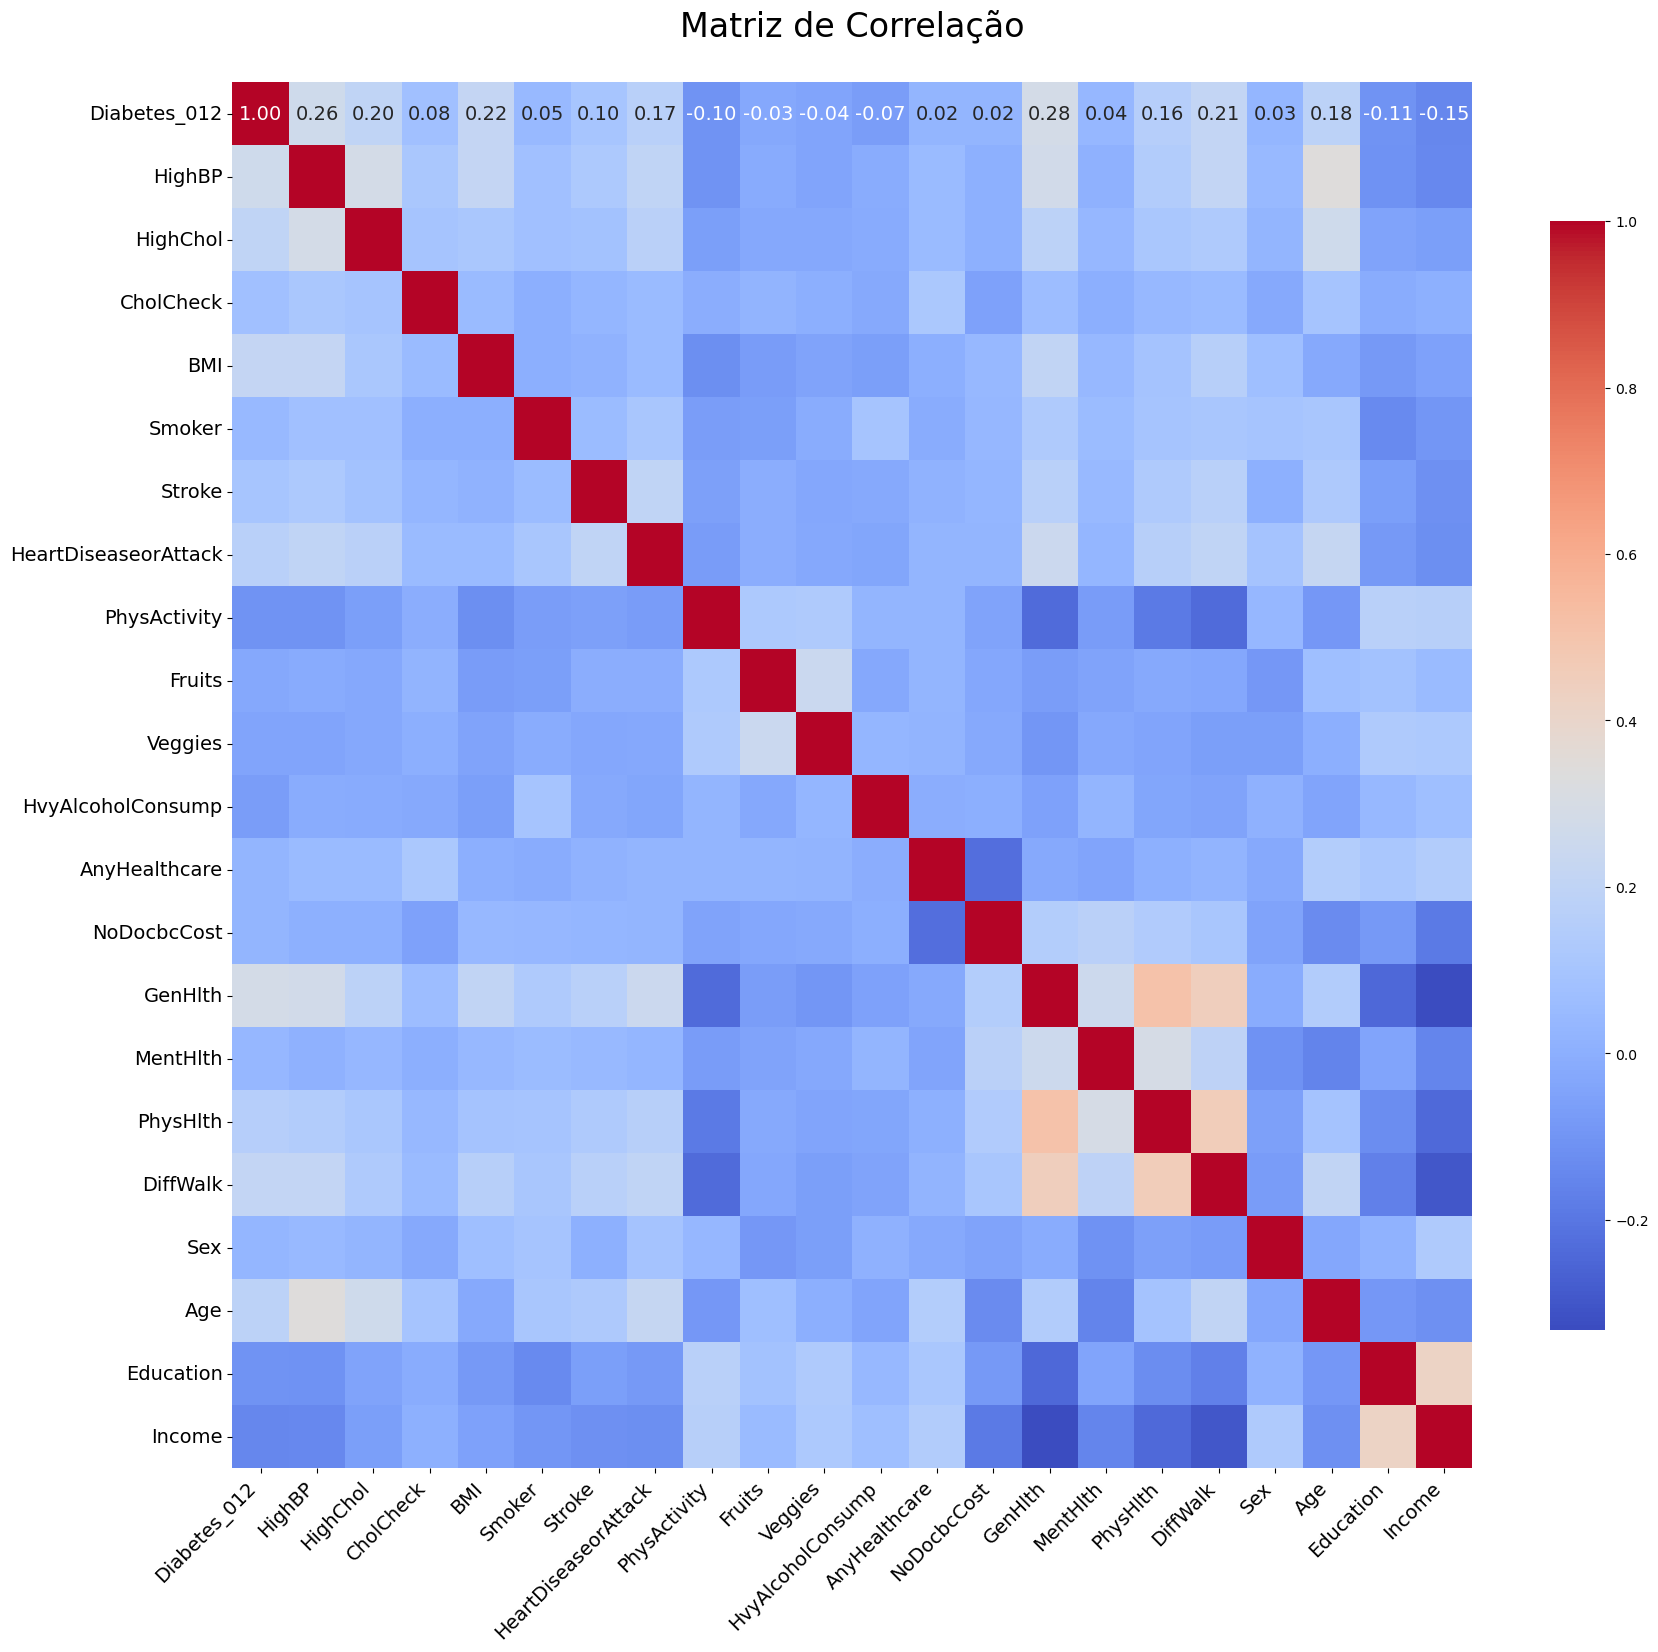

In [61]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 18)) 
plt.title(f'Matriz de Correlação\n', fontsize=24)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14}, cbar_kws={"shrink": 0.8})  # Adjust colorbar size
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

Deu algum bug na visualização, coloquei uma imagem da matriz na pasta e por ela dá pra fazer a análise.

Levando em conta a matriz de correlação podemos observar algumas coisas:demos aprofundar mais em uma área específica se desejar.

1. **Diabetes_012 (Diabetes)**:
- **HighBP (Pressão Alta)**: Existe uma correlação moderada de 0.27 com a diabetes, o que faz sentido, já que a pressão alta é um fator de risco para o desenvolvimento de diabetes.
- **HighChol (Colesterol Alto)**: A correlação também é positiva (0.30), o que sugere que pessoas com colesterol alto têm mais probabilidade de desenvolver diabetes.
- **BMI (Índice de Massa Corporal)**: Correlação moderada de 0.22, indicando que um maior IMC está associado a uma maior chance de diabetes.
- **PhysActivity (Atividade Física)**: Há uma correlação negativa (-0.12), o que implica que a falta de atividade física pode estar relacionada a maiores chances de diabetes.



2. **HighBP (Pressão Alta)**:
- **HighChol (Colesterol Alto)**: Correlação de 0.30, indicando que pessoas com pressão alta também têm maior probabilidade de ter colesterol elevado.
- **Stroke (Derrame)**: Correlação de 0.13, o que é um fator de risco esperado, já que a pressão alta contribui para derrames.
- **HeartDiseaseorAttack (Doença Cardíaca ou Infarto)**: Correlação de 0.21, mostrando que a pressão alta é um fator de risco para doenças cardíacas.



3. **HighChol (Colesterol Alto)**:
- **BMI**: Correlação positiva de 0.21, sugerindo que um IMC elevado pode estar associado a colesterol alto.
- **HeartDiseaseorAttack**: Correlação de 0.18, indicando que colesterol alto está ligado a maiores chances de doenças cardíacas.



4. **CholCheck (Verificação de Colesterol)**:
- A correlação com as variáveis principais é geralmente baixa, sugerindo que o simples fato de verificar o colesterol regularmente não está fortemente associado a outros indicadores de saúde, como diabetes ou doenças cardíacas.



5. **BMI (Índice de Massa Corporal)**:
- **HighBP**: Correlação de 0.21, mostrando que um IMC elevado está associado à pressão alta.
- **PhysActivity**: Correlação negativa de -0.15, indicando que pessoas com IMC elevado tendem a ser menos ativas fisicamente.



6. **Smoker (Fumante)**:
- As correlações entre fumar e outras variáveis de saúde, como diabetes e doenças cardíacas, são relativamente baixas, sugerindo que, neste conjunto de dados, fumar pode não ser o principal fator determinante dessas condições.



7. **Stroke (Derrame)**:
- **HighBP**: Correlação de 0.13, confirmando a relação esperada entre pressão alta e derrames.
- **HeartDiseaseorAttack**: Correlação de 0.18, indicando que pessoas com doenças cardíacas também têm maior probabilidade de ter derrames.



8. **HeartDiseaseorAttack (Doença Cardíaca ou Infarto)**:
- **HighBP** e **HighChol** são fatores de risco evidentes, com correlações de 0.21 e 0.18, respectivamente.
- **PhysActivity**: Correlação negativa (-0.13), sugerindo que a falta de atividade física está associada a maiores chances de doenças cardíacas.



9. **PhysActivity (Atividade Física)**:
- Correlações negativas com **BMI** (-0.15), **HighBP** (-0.13), e **HeartDiseaseorAttack** (-0.13) indicam que a prática de atividades físicas pode reduzir os riscos dessas condições.



10. **Fruits (Consumo de Frutas)** e **Veggies (Consumo de Vegetais)**:
- As correlações com outras variáveis de saúde são fracas, sugerindo que, isoladamente, o consumo de frutas e vegetais pode não ser um fator preditivo forte para as condições de saúde analisadas.



11. **HvyAlcoholConsump (Consumo Excessivo de Álcool)**:
- A correlação com as outras variáveis de saúde é geralmente baixa, mas o impacto a longo prazo pode não ser capturado nesta análise.



12. **GenHlth (Saúde Geral)**:
- **PhysHlth** (0.52) e **MentHlth** (0.35): A saúde geral está fortemente correlacionada com o número de dias em que a saúde física e mental não foram boas.



13. **MentHlth (Saúde Mental)**:
- Correlações negativas com **Income** (-0.21) e **Education** (-0.28) indicam que rendas e níveis de educação mais baixos estão associados a pior saúde mental.



14. **DiffWalk (Dificuldade de Caminhar)**:
- Correlação significativa com **HighBP** (0.22) e **BMI** (0.24), sugerindo que condições relacionadas à mobilidade podem ser exacerbadas pela pressão alta e pelo peso elevado.



15. **Income (Renda)**:
- Correlação negativa com **GenHlth** (-0.37) e **MentHlth** (-0.21), sugerindo que rendas mais baixas estão associadas a pior saúde geral e mental.



# Análise Gráfica

Para facilitar a interpretação dos dados, vamos converter a coluna 'Diabetes_012' de valores numéricos para descrições textuais mais intuitivas ('Sem Diabetes', 'Pré-diabetes', 'Diabetes'). Isso ajudará na visualização gráfica e na compreensão dos resultados.



In [81]:
# Criando um dicionário para substituir os valores numéricos da coluna 'Diabetes_012' por textos descritivos
diabetes_dict = {
    0: 'Sem Diabetes',
    1: 'Pré-diabetes',
    2: 'Diabetes'
}

# Aplicando o dicionário à coluna 'Diabetes_012' para substituir os valores
df['Diabetes_012'] = df['Diabetes_012'].map(diabetes_dict)

A partir dessa mudança, os gráficos e análises serão mais fáceis de interpretar, especialmente para quem não está familiarizado com os códigos numéricos das categorias.



#### Visualização das Variáveis Binárias


Vamos agora visualizar a distribuição das variáveis binárias (Sim/Não) presentes no conjunto de dados. Utilizaremos gráficos de rosca para mostrar a proporção de respostas 'Sim' e 'Não' para cada uma dessas variáveis, o que nos ajudará a entender melhor o perfil da população estudada.


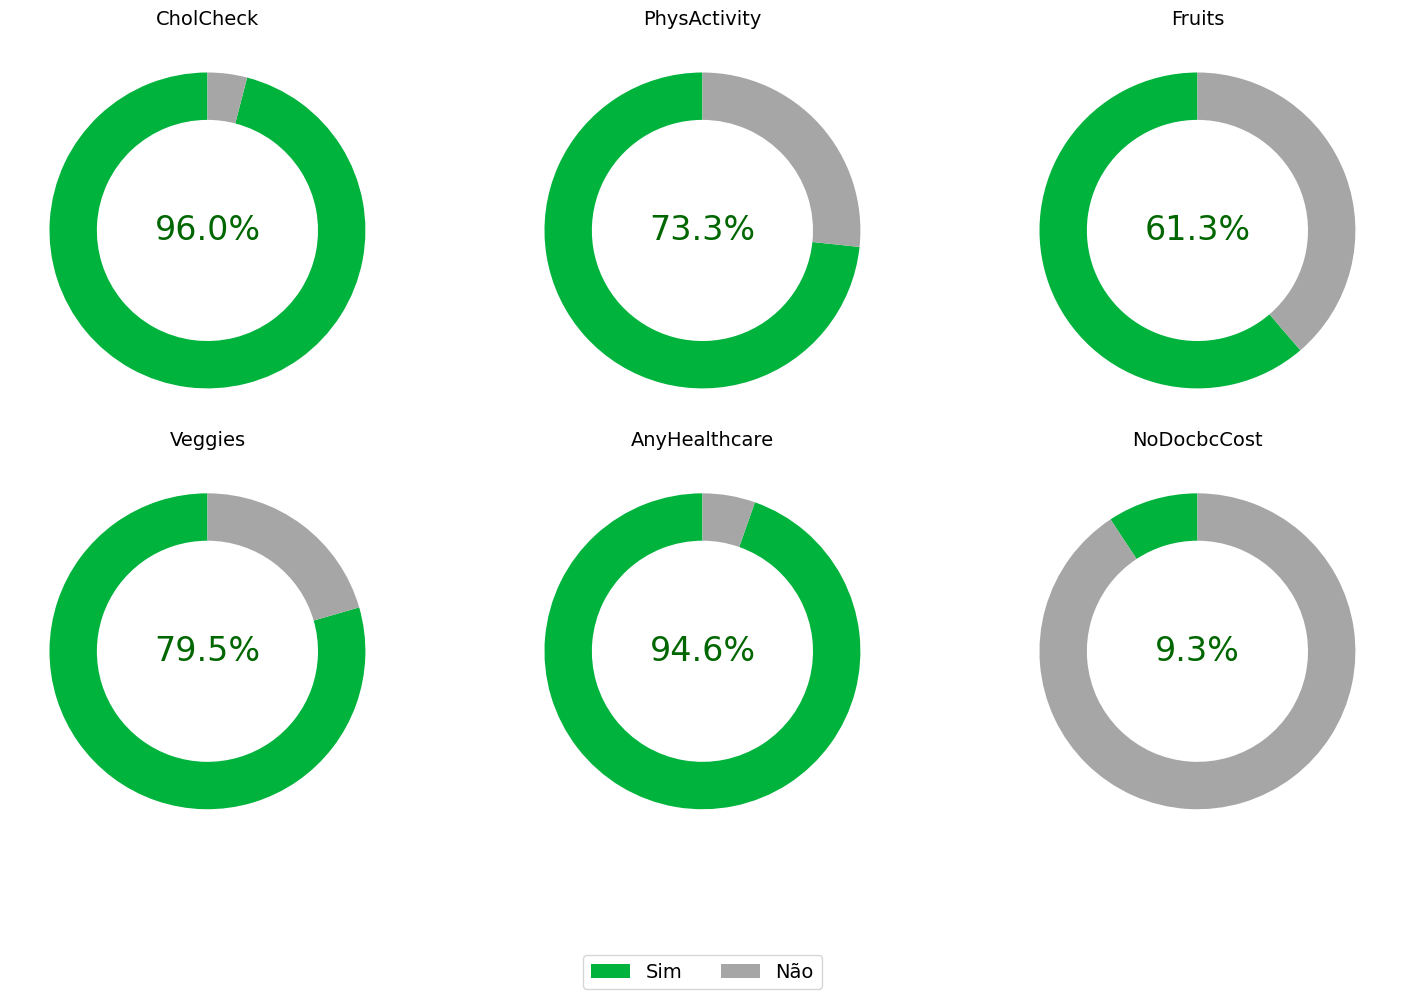

In [171]:
# Redefinir as variáveis e a função para gerar o gráfico, e em seguida executá-lo

# Definir as variáveis binárias saudáveis que devem ser incluídas no painel
healthy_behavior_columns = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost']

# Cores para o gráfico
lighter_green = '#00b33c'  # Verde mais claro para "Sim"
lighter_grey = '#a6a6a6'   # Cinza claro para "Não"
darker_green = '#006600'   # Verde mais escuro para o número central

# Função para gerar os gráficos de rosca com os ajustes solicitados
def plot_multiple_donut_charts_custom(columns, df):
    # Definir o número de colunas e linhas automaticamente baseado na quantidade de variáveis
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    # Criar subplots ajustados
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.ravel()

    # Loop através de cada coluna e criação dos gráficos de rosca
    for idx, column in enumerate(columns):
        # Cálculo da contagem de 1s (Sim) e 0s (Não)
        counts = df[column].value_counts()
        sizes = [counts.get(1, 0), counts.get(0, 0)]
        
        # Definir cores: verde mais claro para 'Sim' e cinza claro para 'Não'
        colors = [lighter_green, lighter_grey]
        
        # Criar gráfico de pizza com um buraco no centro (gráfico de rosca)
        axes[idx].pie(sizes, labels=['', ''], autopct='', startangle=90, colors=colors, wedgeprops={'width': 0.3})
        
        # Adicionar a porcentagem no centro do gráfico para 'Sim' com o verde mais escuro
        total = sum(sizes)
        if total > 0:
            percentage = (sizes[0] / total) * 100
            axes[idx].text(0, 0, f'{percentage:.1f}%', color=darker_green, fontsize=24, ha='center', va='center')

        # Definir título como o nome da coluna
        axes[idx].set_title(f'{column}', fontsize=14)
    
    # Remover subplots vazios
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    # Adicionar legenda no rodapé
    fig.legend(['Sim', 'Não'], loc='lower center', fontsize=14, ncol=2)

    # Ajustar layout e espaço para a legenda no rodapé
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.show()

# Gerar os gráficos de rosca com as customizações solicitadas para as colunas de comportamento saudável
plot_multiple_donut_charts_custom(healthy_behavior_columns, df)


Os gráficos de rosca nos mostram a proporção de respostas 'Sim' e 'Não' para cada variável relacionada a comportamentos saudáveis. Por exemplo:

- **CholCheck:** 96% dos indivíduos realizaram exames de colesterol regularmente, o que demonstra uma prática de cuidado preventivo com a saúde.
- **PhysActivity:** Cerca de 73% dos indivíduos relatam praticar atividades físicas regularmente, um comportamento essencial para manter a saúde cardiovascular e o bem-estar geral.
- **Fruits:** Aproximadamente 58% dos respondentes consomem frutas com regularidade, o que indica uma preocupação com a alimentação saudável.
- **Veggies:** 64% dos indivíduos afirmam incluir vegetais na alimentação, outro indicador positivo de hábitos alimentares saudáveis.
- **AnyHealthcare:** 85% dos respondentes relataram ter algum tipo de acesso a cuidados de saúde, o que é um fator importante para o monitoramento e prevenção de doenças.
- **NoDocbcCost:** Apenas 12% dos indivíduos afirmam ter deixado de consultar um médico devido a custo, o que significa que a maioria tem acesso financeiro aos cuidados de saúde.

Esses dados oferecem uma visão de uma parcela da população que adota comportamentos saudáveis. A combinação de práticas como exames regulares de colesterol, atividade física, consumo de frutas e vegetais, e acesso a cuidados de saúde sugere que essa população possui hábitos que contribuem para a prevenção de doenças. A baixa taxa de pessoas que deixaram de procurar um médico por questões financeiras reforça a importância de um sistema de saúde acessível para todos. Esses fatores podem influenciar positivamente um modelo de classificação para condições como diabetes, favorecendo a identificação de riscos em pessoas que, apesar de adotarem comportamentos saudáveis, ainda podem desenvolver doenças.

#### Distribuição do Status de Diabetes

Vamos visualizar a distribuição dos diferentes status de diabetes na população. Isso nos ajudará a entender a prevalência de diabetes e pré-diabetes no conjunto de dados.



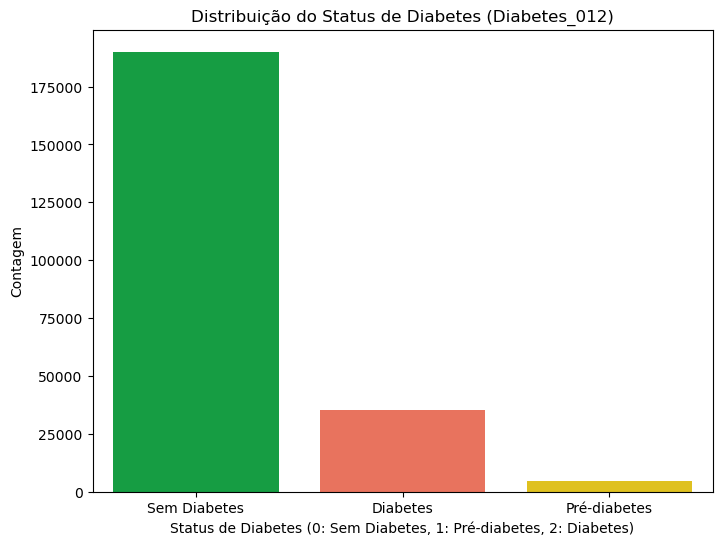

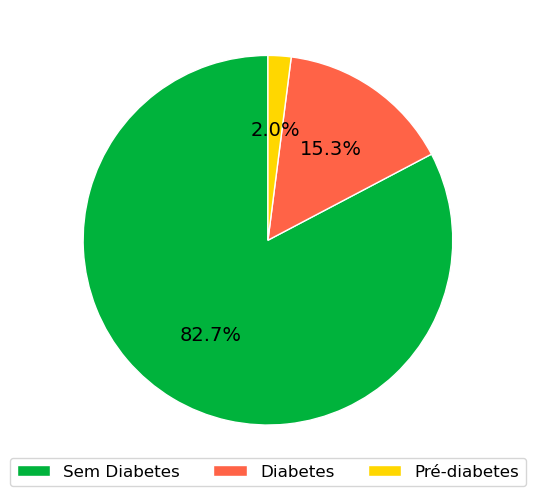

In [179]:
# 1. Gráfico de barras - Distribuição do Status de Diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=df, palette=['#00b33c', '#ff6347', '#ffd700'])  # Verde, Tomate, Amarelo
plt.title('Distribuição do Status de Diabetes (Diabetes_012)')
plt.xlabel('Status de Diabetes (0: Sem Diabetes, 1: Pré-diabetes, 2: Diabetes)')
plt.ylabel('Contagem')
plt.show()

# 2. Gráfico de pizza - Distribuição do Status de Diabetes
# Contagem de ocorrências para a coluna Diabetes_012
diabetes_counts = df['Diabetes_012'].value_counts()

# Definir cores: Verde, Tomate, Amarelo
colors = ['#00b33c', '#ff6347', '#ffd700']

# Rótulos para o gráfico
labels = ['Sem Diabetes', 'Diabetes', 'Pré-diabetes']

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'})
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), fontsize=12, ncol=3)
plt.show()

O gráfico de barras mostra a distribuição dos diferentes status de diabetes:

- A maioria dos indivíduos (cerca de 83%) não possui diabetes.
- Cerca de 15% dos indivíduos são diabéticos.
- Apenas 2% estão no estágio de pré-diabetes.

Isso indica que a maioria da população estudada não apresenta diabetes, mas há uma parcela significativa com a doença ou em risco de desenvolvê-la. Essa distribuição mostra um viés significativo, com muito mais pessoas sem diabetes em comparação com as outras categorias.

#### Distribuição do IMC por Status de Diabetes

Para entender a relação entre o Índice de Massa Corporal (IMC) e o diabetes, vamos visualizar a distribuição do IMC para cada status de diabetes.



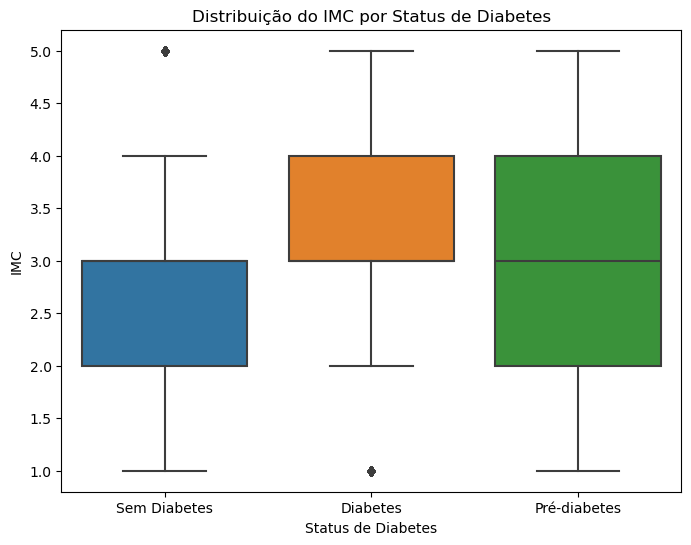

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('Distribuição do IMC por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('IMC')
plt.show()

O gráfico boxplot da variável BMI (Índice de Massa Corporal) revela a diferença de IMC entre indivíduos com e sem diabetes:
- Pessoas com diabetes tendem a ter valores de IMC mais altos em relação aos que não possuem a doença.
- O grupo de pré-diabéticos também apresenta IMCs elevados, sugerindo que o sobrepeso pode ser um fator preditivo importante para a condição.

#### Conclusão

A base de dados possui uma boa variedade de informações relevantes para a análise do diabetes e suas condições associadas. Algumas considerações importantes incluem:

1. **Qualidade dos Dados:** Não foram identificados valores nulos nas variáveis, o que é um ótimo indicativo de que a base está pronta para ser usada sem a necessidade de tratamento de valores ausentes.

2. **Balanceamento das Classes:** Há um claro desbalanceamento nos dados, especialmente na coluna Diabetes_012, onde a maioria das pessoas não tem diabetes. Esse desbalanceamento pode influenciar a performance de modelos preditivos, exigindo o uso de técnicas de balanceamento, como reamostragem ou ajuste de pesos durante o treinamento do modelo.

3. **Relevância das Variáveis:** Variáveis como IMC, histórico de doenças cardíacas e atividade física são claramente discriminantes entre os diferentes grupos (diabetes, pré-diabetes, sem diabetes), sugerindo que a base é adequada para modelos preditivos que visem identificar o risco de diabetes.

4. **Possíveis Melhorias:** Algumas variáveis binárias, como fumar e dificuldade de caminhar, também estão associadas a condições de saúde relevantes, e podem ser usadas para enriquecer a análise preditiva.

De modo geral, a base está bem estruturada e fornece um bom suporte para a criação de modelos de machine learning. No entanto, devido ao viés de classe (grande número de indivíduos sem diabetes), ajustes na forma de lidar com as classes minoritárias são recomendados para garantir a eficácia preditiva.

# Teste de Hipótese

### Hipótese 1: A pesquisa relizada é suficiente para predizer a condição de Diabetes do respondente com uma taxa de mais de 80% de acerto?


Para testar essa hipótese, vamos construir um modelo de classificação utilizando uma árvore de decisão. O objetivo é verificar se é possível prever o status de diabetes dos indivíduos com uma precisão superior a 80% com base nas variáveis disponíveis.

In [100]:
# Lista de variaveis categóricas
variaveis_categoricas = ['GenHlth','Education','Income','Age','BMI','MentHlth','PhysHlth']
# Separa os campos categóricos para transformar em dummies
base_categoricos = df[variaveis_categoricas]
# Transforma os campos categóricos em dummies
base_categoricos = pd.get_dummies(base_categoricos, dtype = int)
# Cria uma base de numéricos retirando os categóricos
base_numericos = df.drop(variaveis_categoricas, axis = 1)
# Junta as bases de numéricos e categóricos e cria a base de variáveis independentes
base_modelo = pd.concat([base_categoricos, base_numericos], axis = 1)
base_modelo.head(10)

,GenHlth,Education,Income,Age,BMI,MentHlth,PhysHlth,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,5,4,3,9,4,5,5,Sem Diabetes,1,1,1,1,0,0,0,0,1,0,1,0,1,0
1,3,6,1,7,2,3,3,Sem Diabetes,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,5,4,8,9,3,5,5,Sem Diabetes,1,1,1,0,0,0,0,1,0,0,1,1,1,0
3,2,3,6,11,3,3,3,Sem Diabetes,1,0,1,0,0,0,1,1,1,0,1,0,0,0
4,2,5,4,11,2,4,3,Sem Diabetes,1,1,1,0,0,0,1,1,1,0,1,0,0,0
5,2,6,8,10,2,3,3,Sem Diabetes,1,1,1,1,0,0,1,1,1,0,1,0,0,1
6,3,6,7,9,3,3,5,Sem Diabetes,1,0,1,1,0,0,0,0,0,0,1,0,0,0
7,3,4,4,11,2,3,3,Sem Diabetes,1,1,1,1,0,0,1,0,1,0,1,0,1,0
8,5,5,1,9,3,5,5,Diabetes,1,1,1,1,0,1,0,1,1,0,1,0,1,0
9,2,4,3,8,2,3,3,Sem Diabetes,0,0,1,0,0,0,0,0,1,0,1,0,0,1


In [101]:
# Cria a base da variáveis independentes, chamado a de X.
X = base_modelo.drop(['Diabetes_012'], axis = 1)
# Cria a base da variável dependente
y = base_modelo['Diabetes_012']
# Divide as bases X e y em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
# Cria a variável que vai criar a árvore de decisão - a árvore de decisão é o classificador.
clf = DecisionTreeClassifier()
# Treina (Cria o modelo)
clf.fit(X_train, y_train)
# Realiza o Teste
clf.score(X_test, y_test)

0.7396387901646478

O modelo de árvore de decisão treinado com a base que passou pelo tratamento de outliers alcançou uma precisão de 73,96% ao prever o status de diabetes. A hipótese inicial de que o modelo poderia prever a condição de diabetes com mais de 80% de acurácia não foi confirmada, uma vez que a precisão alcançada ficou abaixo desse valor em ambos os casos.

### Hipótese 2: O tratamento de Outliers aplicado melhora a capacidade preditiva do modelo comparado a base original?

Vamos agora avaliar se o tratamento dos outliers nas variáveis 'BMI', 'MentHlth' e 'PhysHlth' impacta na performance do modelo preditivo. Treinaremos um novo modelo usando a base original, sem o tratamento de outliers, e compararemos os resultados.



In [105]:
# Lista de variaveis categóricas
variaveis_categoricas = ['GenHlth','Education','Income','Age']
# Separa os campos categóricos para transformar em dummies
base_categoricos = df_original[variaveis_categoricas]
# Transforma os campos categóricos em dummies
base_categoricos = pd.get_dummies(base_categoricos, dtype = int)
# Cria uma base de numéricos retirando os categóricos
base_numericos = df_original.drop(variaveis_categoricas, axis = 1)
# Junta as bases de numéricos e categóricos e cria a base de variáveis independentes
base_modelo = pd.concat([base_categoricos, base_numericos], axis = 1)
base_modelo.head(10)

,GenHlth,Education,Income,Age,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex
0,5.0,4.0,3.0,9.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,0.0
1,3.0,6.0,1.0,7.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,4.0,8.0,9.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,0.0
3,2.0,3.0,6.0,11.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.0,5.0,4.0,11.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
5,2.0,6.0,8.0,10.0,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
6,3.0,6.0,7.0,9.0,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0
7,3.0,4.0,4.0,11.0,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,5.0,5.0,1.0,9.0,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,30.0,30.0,1.0,0.0
9,2.0,4.0,3.0,8.0,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [106]:
# Cria a base da variáveis independentes, chamado a de X.
X = base_modelo.drop(['Diabetes_012'], axis = 1)
# Cria a base da variável dependente
y = base_modelo['Diabetes_012']
# Divide as bases X e y em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
# Cria a variável que vai criar a árvore de decisão - a árvore de decisão é o classificador.
clf = DecisionTreeClassifier()
# Treina (Cria o modelo)
clf.fit(X_train, y_train)
# Realiza o Teste
clf.score(X_test, y_test)

0.7675812046672974

O modelo treinado com a base original obteve uma precisão de aproximadamente 76%. Comparado ao modelo anterior (74% com tratamento de outliers), observamos que o tratamento dos outliers não melhorou a capacidade preditiva do modelo. Na verdade, a precisão foi ligeiramente superior sem o tratamento, indicando que os outliers podem conter informações relevantes para a previsão.

### Consideraçãoes Finais

O estudo realizado demonstrou que o banco de dados é adequado para entender as correlações entre as variáveis de saúde e o risco de diabetes. Variáveis como IMC, pressão alta e nível de atividade física mostraram-se significativamente associadas à presença de diabetes, corroborando o conhecimento médico existente. Além disso, o modelo preditivo desenvolvido obteve uma precisão moderada, ainda que abaixo dos 80% esperados, sugerindo que o conjunto de dados pode ser melhorado para aumentar a eficácia preditiva, especialmente ao lidar com o desbalanceamento de classes.

A remoção de outliers não proporcionou um aumento na precisão do modelo, destacando que o tratamento desses valores deve ser cuidadosamente considerado, dependendo do impacto nas análises subsequentes. No geral, o projeto cumpre seu objetivo de explorar as inter-relações entre as variáveis e oferece uma base sólida para o desenvolvimento de modelos preditivos mais robustos, especialmente com ajustes nas classes minoritárias e variáveis-chave.

### Grupo
- Caíque Walter Silva - RM550693
- Gabriela Marsiglia - RM551237
- Guilherme Nobre Bernardo - RM98604
- Matheus José de Lima Costa - RM551157